In [56]:
import pandas as pd
import numpy as np
# reading the three datasets of Associates abc,xyz,klm
df1=pd.read_csv(r'C:\Users\Admin\Downloads\global project\associate-abc (1).csv',encoding='unicode_escape')
df2=pd.read_csv(r'C:\Users\Admin\Downloads\global project\associate-xyz (1).csv',encoding='unicode_escape')
df3=pd.read_csv(r'C:\Users\Admin\Downloads\global project\associate-klm (1).csv',encoding='unicode_escape')

In [57]:
df1.fillna(0)
df2.fillna(0)
df3.fillna(0)

,Date,No of Leads,Time Spent on LG (in mins)
0,9/1/2023,6.0,540.0
1,10/1/2023,9.0,540.0
2,11/1/2023,0.0,0.0
3,12/1/2023,11.0,540.0
4,13/1/2023,16.0,540.0
...,...,...,...
119,8/5/2023,10.0,420.0
120,9/5/2023,9.0,540.0
121,10/5/2023,8.0,360.0
122,11/5/2023,12.0,420.0


In [58]:
#merging the 3 datasets for cleaning and formatting
df = pd.concat([df1,df2,df3],axis=0,ignore_index= True)

In [59]:
df

,Date,No of Leads,Time Spent on LG (in mins)
0,9/1/2023,2.0,300.0
1,10/1/2023,1.0,300.0
2,11/1/2023,5.0,300.0
3,12/1/2023,4.0,300.0
4,13/1/2023,5.0,300.0
...,...,...,...
263,8/5/2023,10.0,420.0
264,9/5/2023,9.0,540.0
265,10/5/2023,8.0,360.0
266,11/5/2023,12.0,420.0


In [60]:
df.isnull().sum()

Date                           0
No of Leads                   59
Time Spent on LG (in mins)    72
dtype: int64

In [61]:
df.fillna(0)

,Date,No of Leads,Time Spent on LG (in mins)
0,9/1/2023,2.0,300.0
1,10/1/2023,1.0,300.0
2,11/1/2023,5.0,300.0
3,12/1/2023,4.0,300.0
4,13/1/2023,5.0,300.0
...,...,...,...
263,8/5/2023,10.0,420.0
264,9/5/2023,9.0,540.0
265,10/5/2023,8.0,360.0
266,11/5/2023,12.0,420.0


In [62]:
df.shape

(268, 3)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        268 non-null    object 
 1   No of Leads                 209 non-null    float64
 2   Time Spent on LG (in mins)  196 non-null    float64
dtypes: float64(2), object(1)
memory usage: 6.4+ KB


In [64]:
pd.isnull(df)

,Date,No of Leads,Time Spent on LG (in mins)
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
263,False,False,False
264,False,False,False
265,False,False,False
266,False,False,False


In [65]:
pd.isnull(df).sum()

Date                           0
No of Leads                   59
Time Spent on LG (in mins)    72
dtype: int64

In [66]:
df.dropna(inplace=True)

In [67]:
df.shape

(196, 3)

In [68]:
df.describe()

,No of Leads,Time Spent on LG (in mins)
count,196.000000,196.000000
mean,9.250000,375.969388
std,4.166256,100.074737
min,0.000000,0.000000
25%,6.000000,300.000000
50%,10.000000,360.000000
75%,12.250000,420.000000
max,23.000000,600.000000


In [69]:
df.dtypes

Date                           object
No of Leads                   float64
Time Spent on LG (in mins)    float64
dtype: object

#outliers
#using Zscore to find the ouliers in the datasets

In [70]:
from scipy.stats import zscore
# Calculate Z-Scores for numerical columns
z_scores = zscore(df[['No of Leads', 'Time Spent on LG (in mins)']])
# Define a threshold for Z-Score (e.g., 3 standard deviations)
threshold = 3
# Identify potential outliers and absolute values
outliers = (abs(z_scores) > threshold).any(axis=1)
# Display the potential outliers
potential_outliers = df[outliers]
display(potential_outliers)

,Date,No of Leads,Time Spent on LG (in mins)
46,24/2/2023,1.0,60.0
53,3/3/2023,0.0,0.0
234,9/4/2023,23.0,200.0


# Data Exploration

In [71]:

df1.dropna(inplace=True)
df2.dropna(inplace=True)
df3.dropna(inplace=True)

# Calculate the average leads per day for 3 Associates
average_leads_per_day_abc = df1['No of Leads'].mean()
average_leads_per_day_xyz = df2['No of Leads'].mean()
average_leads_per_day_klm = df3['No of Leads'].mean()
print("ASSOCIATE ABC average lead generated per day: ",average_leads_per_day_abc)
print("ASSOCIATE xyz average lead generated per day: ",average_leads_per_day_xyz)
print("ASSOCIATE klm average lead generated per day: ",average_leads_per_day_klm)

ASSOCIATE ABC average lead generated per day:  6.541666666666667
ASSOCIATE xyz average lead generated per day:  10.853658536585366
ASSOCIATE klm average lead generated per day:  9.850467289719626


2.Average Time Spent per day

In [72]:
timespent_per_day_abc = df1['Time Spent on LG (in mins)']
timespent_per_day_xyz = df2['Time Spent on LG (in mins)']
timespent_per_day_klm = df3['Time Spent on LG (in mins)']
# Calculate the average timespent per day
average_timespent_per_day_abc = sum(timespent_per_day_abc) / len(timespent_per_day_abc)
average_timespent_per_day_xyz = sum(timespent_per_day_xyz) / len(timespent_per_day_xyz)
average_timespent_per_day_klm = sum(timespent_per_day_klm) / len(timespent_per_day_klm)
print("ASSOCIATE abc average timespent per day: ",average_timespent_per_day_abc)
print("ASSOCIATE xyz average timespent per day: ",average_timespent_per_day_xyz)
print("ASSOCIATE klm average timespent per day: ",average_timespent_per_day_klm)

ASSOCIATE abc average timespent per day:  346.875
ASSOCIATE xyz average timespent per day:  387.0731707317073
ASSOCIATE klm average timespent per day:  384.76635514018693


3.conversation Rates

In [73]:
# Calculate the conversion rate (leads per hour) _ ASSOCIATE ABC
total_leads_abc = df1['No of Leads'].sum()
total_time_minutes_abc = df1['Time Spent on LG (in mins)'].sum()
# Converting time from minutes to hours
total_time_hours_abc = total_time_minutes_abc/ 60
conversion_rate_abc = total_leads_abc / total_time_hours_abc
print("abc Conversation Rates :",conversion_rate_abc)

# Calculate the conversion rate (leads per hour) _ ASSOCIATE xyz
total_leads_xyz = df2['No of Leads'].sum()
total_time_minutes_xyz = df2['Time Spent on LG (in mins)'].sum()
# Converting time from minutes to hours
total_time_hours_xyz = total_time_minutes_xyz/ 60
conversion_rate_xyz = total_leads_xyz / total_time_hours_xyz
print("xyz Conversation Rates :",conversion_rate_xyz)

# Calculate the conversion rate (leads per hour) _ ASSOCIATE KLM
total_leads_klm = df3['No of Leads'].sum()
total_time_minutes_klm = df3['Time Spent on LG (in mins)'].sum()
# Converting time from minutes to hours
total_time_hours_klm = total_time_minutes_klm/ 60
conversion_rate_klm = total_leads_klm / total_time_hours_klm
print("klm Conversation Rates :",conversion_rate_klm)


abc Conversation Rates : 1.1315315315315315
xyz Conversation Rates : 1.6824196597353498
klm Conversation Rates : 1.5360699538498908


4.Total Leads Generated over the given time period.

In [74]:
total_leads_generated_abc = df1['No of Leads'].sum()
print("Total leads generated over the given time period by ABC:",total_leads_generated_abc)

total_leads_generated_xyz = df2['No of Leads'].sum()
print("Total leads generated over the given time period by XYZ:",total_leads_generated_xyz)

total_leads_generated_klm = df3['No of Leads'].sum()
print("Total leads generated over the given time period by KLM:",total_leads_generated_klm)

Total leads generated over the given time period by ABC: 314.0
Total leads generated over the given time period by XYZ: 445.0
Total leads generated over the given time period by KLM: 1054.0


# Data Analysis and Visualization

# ASSOCIATE ABC

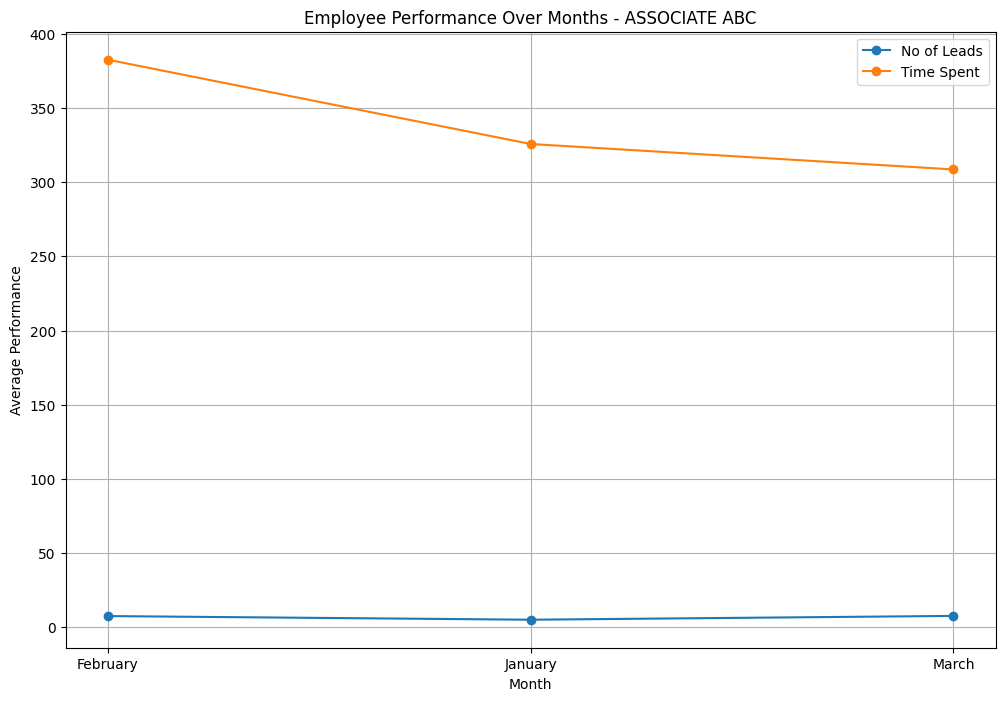

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df1' with columns 'Date', 'No of Leads', and 'Time Spent on LG (in mins)'
# If the 'Date' column is not in datetime format, you can convert it using pd.to_datetime
df1['Date'] = pd.to_datetime(df1['Date'], format='%d/%m/%Y')

# Extracting month names from the 'Date' column
df1['Month'] = df1['Date'].dt.strftime('%B')

# Grouping data by month and calculating average performance metrics
monthly_performance = df1.groupby('Month').agg({
    'No of Leads': 'mean',
    'Time Spent on LG (in mins)': 'mean'
}).reset_index()

# Plotting line chart
plt.figure(figsize=(12, 8))

# Plotting No of Leads
plt.plot(monthly_performance['Month'], monthly_performance['No of Leads'], label='No of Leads', marker='o')

# Plotting Time Spent
plt.plot(monthly_performance['Month'], monthly_performance['Time Spent on LG (in mins)'], label='Time Spent', marker='o')

# Formatting the plot
plt.title('Employee Performance Over Months - ASSOCIATE ABC')
plt.xlabel('Month')
plt.ylabel('Average Performance')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


# ASSOCIATE XYZ

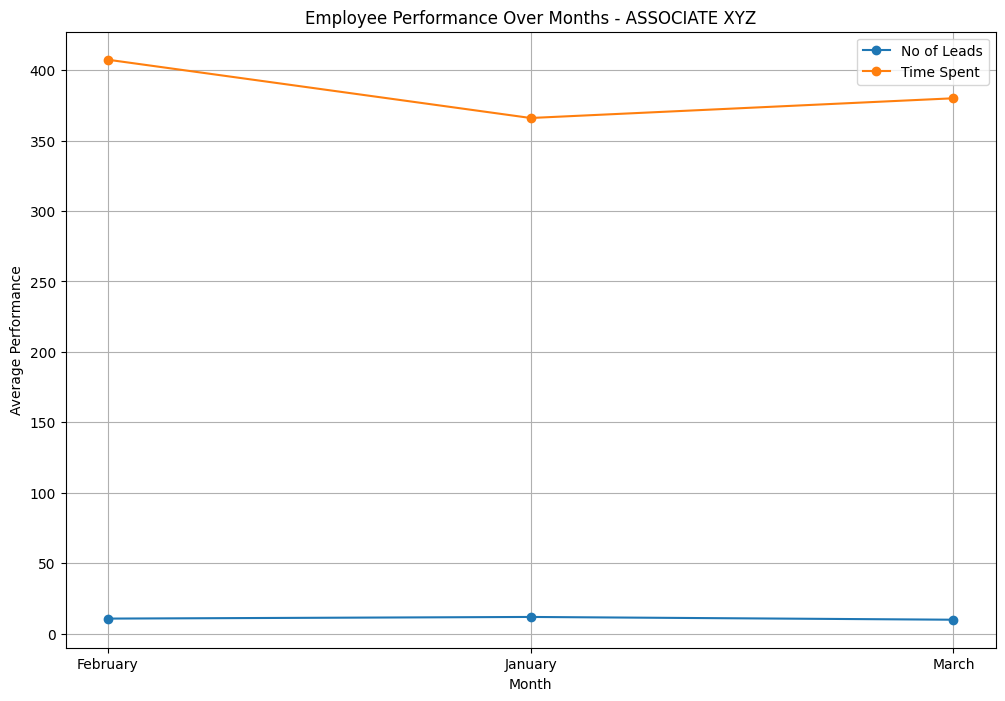

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

#  DataFrame 'df1' with columns 'Date', 'No of Leads', and 'Time Spent on LG (in mins)'
# If the 'Date' column is not in datetime format, you can convert it using pd.to_datetime
df2['Date'] = pd.to_datetime(df1['Date'], format='%d/%m/%Y')

# Extracting month names from the 'Date' column
df2['Month'] = df2['Date'].dt.strftime('%B')

# Grouping data by month and calculating average performance metrics
monthly_performance = df2.groupby('Month').agg({
    'No of Leads': 'mean',
    'Time Spent on LG (in mins)': 'mean'
}).reset_index()

# Plotting line chart
plt.figure(figsize=(12, 8))

# Plotting No of Leads
plt.plot(monthly_performance['Month'], monthly_performance['No of Leads'], label='No of Leads', marker='o')

# Plotting Time Spent
plt.plot(monthly_performance['Month'], monthly_performance['Time Spent on LG (in mins)'], label='Time Spent', marker='o')

# Formatting the plot
plt.title('Employee Performance Over Months - ASSOCIATE XYZ')
plt.xlabel('Month')
plt.ylabel('Average Performance')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# ASSOCIATE KLM

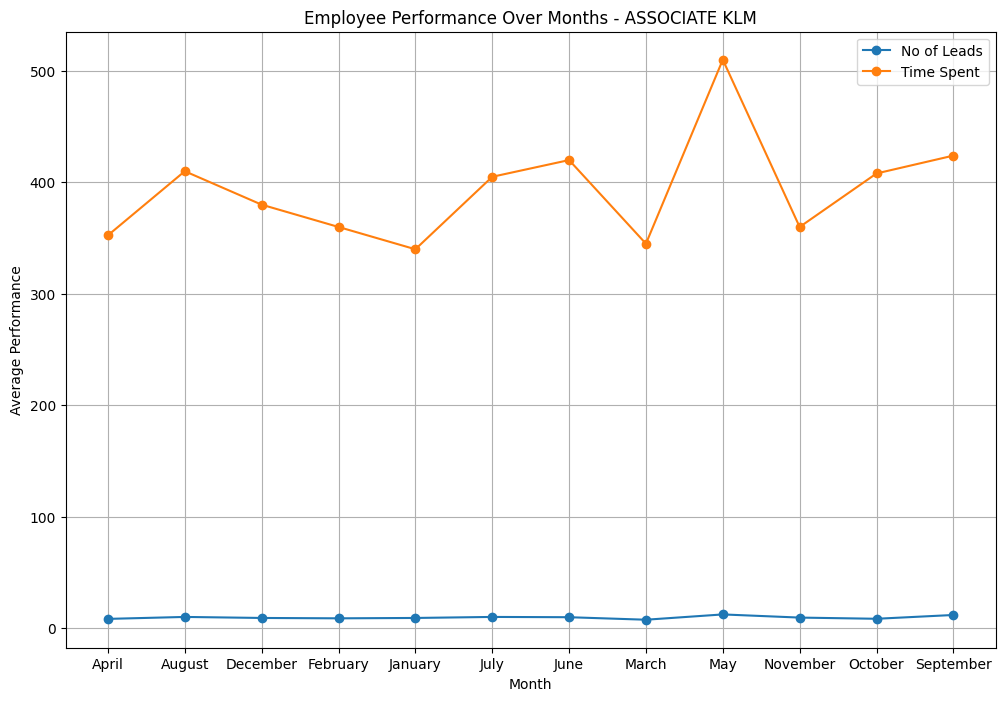

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import string

def remove_non_printable(s):
    return ''.join(filter(lambda x: x in string.printable and x != '\x0c', str(s)))

# Remove special characters from column names
df3.columns = [remove_non_printable(col) for col in df3.columns]

# Attempt to convert 'Date' column to datetime using the specified format
try:
    df3['Date'] = pd.to_datetime(df3['Date'], format='%d/%m/%Y')
except ValueError:
    # If the above format fails, try an alternative format
    df3['Date'] = pd.to_datetime(df3['Date'], errors='coerce')

# Extracting month names from the 'Date' column
df3['Month'] = df3['Date'].dt.strftime('%B')

# Grouping data by month and calculating average performance metrics
monthly_performance = df3.groupby('Month').agg({
    'No of Leads': 'mean',
    'Time Spent on LG (in mins)': 'mean'
}).reset_index()


# Plotting line chart
plt.figure(figsize=(12, 8))

# Plotting No of Leads
plt.plot(monthly_performance['Month'], monthly_performance['No of Leads'], label='No of Leads', marker='o')

# Plotting Time Spent
plt.plot(monthly_performance['Month'], monthly_performance['Time Spent on LG (in mins)'], label='Time Spent', marker='o')

# Formatting the plot
plt.title('Employee Performance Over Months - ASSOCIATE KLM')
plt.xlabel('Month')
plt.ylabel('Average Performance')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [78]:
df1.columns

Index(['Date', 'No of Leads', 'Time Spent on LG (in mins)', 'Month'], dtype='object')

# PREDICTIONS FOR NEXT MONTH

# next month performance predictions for ASSOCIATE ABC

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd

# df1 is a DataFrame with cleaned and prepared data
# Convert 'Date' to datetime format
df1['Date'] = pd.to_datetime(df1['Date'])

# Extract additional features
df1['Month'] = df1['Date'].dt.month
df1['Day'] = df1['Date'].dt.day

# Define features (X) and target variable (y)
X = df1[['Month', 'Day', 'No of Leads']]
y = df1['Time Spent on LG (in mins)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Replace the placeholder values with your actual data
next_month = 4  # the next month's value
expected_leads = [1,3,6,7,9,12,13,10,2,7,5,11]  # Replace with expected values

# Prepare a DataFrame with expected 'No of Leads' for each employee
next_month_data = pd.DataFrame({
    'Month': [next_month] * len(expected_leads),
    'Day': [1] * len(expected_leads),  #  the first day of the next month
    'No of Leads': expected_leads
})

# Predict 'Time Spent on LG (in mins)' for the next month
next_month_data['Time Spent Projection'] = model.predict(next_month_data[['Month', 'Day', 'No of Leads']])

# Display the projections
print(next_month_data[['No of Leads', 'Time Spent Projection']])


    No of Leads  Time Spent Projection
0             1             219.785345
1             3             248.386195
2             6             291.287469
3             7             305.587894
4             9             334.188743
5            12             377.090018
6            13             391.390442
7            10             348.489168
8             2             234.085770
9             7             305.587894
10            5             276.987044
11           11             362.789593


# next month performance predictions for ASSOCIATE XYZ 

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd

#  df2 is DataFrame with cleaned and prepared data
# Converting 'Date' to datetime format
df2['Date'] = pd.to_datetime(df2['Date'])

# Extract additional features
df2['Month'] = df2['Date'].dt.month
df2['Day'] = df2['Date'].dt.day

# Define features (X) and target variable (y)
X = df2[['Month', 'Day', 'No of Leads']]
y = df2['Time Spent on LG (in mins)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1, random_state=42)

# Removing rows with missing values from both X_train and y_train
X_train = X_train.dropna()
y_train = y_train[X_train.index]

# Training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

next_month = 4  #  the next month's value (APRIL)
expected_leads = [1,3,6,7,9,12,13,10,2,7,5,11]  #  expected values for Associate XYZ

# Preparing a DataFrame with expected 'No of Leads' for employee
next_month_data = pd.DataFrame({
    'Month': [next_month] * len(expected_leads),
    'Day': [1] * len(expected_leads),  #  the first day of the next month
    'No of Leads': expected_leads
})

# Predict 'Time Spent on LG (in mins)' for the next month
next_month_data['Time Spent Projection'] = model.predict(next_month_data[['Month', 'Day', 'No of Leads']])

# Display the projections
print(next_month_data[['No of Leads', 'Time Spent Projection']])

    No of Leads  Time Spent Projection
0             1             329.438006
1             3             353.385917
2             6             389.307785
3             7             401.281741
4             9             425.229652
5            12             461.151519
6            13             473.125475
7            10             437.203608
8             2             341.411962
9             7             401.281741
10            5             377.333829
11           11             449.177564


# next month performance predictions for ASSOCIATE KLM

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd

# Assuming df is your DataFrame with cleaned and prepared data
# Convert 'Date' to datetime format
df3['Date'] = pd.to_datetime(df3['Date'])

# Extract additional features
df3['Month'] = df3['Date'].dt.month
df3['Day'] = df3['Date'].dt.day

# Define features (X) and target variable (y)
X = df3[['Month', 'Day', 'No of Leads']]
y = df3['Time Spent on LG (in mins)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1, random_state=42)

# Remove rows with missing values from both X_train and y_train
X_train = X_train.dropna()
y_train = y_train[X_train.index]

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Replace the placeholder values with your actual data
next_month = 6  # Replace with the next month's value
expected_leads = [1,3,6,7,9,12,13,10,2,7,5,11]  # Replace with expected values

# Prepare a DataFrame with expected 'No of Leads' for each employee
next_month_data = pd.DataFrame({
    'Month': [next_month] * len(expected_leads),
    'Day': [1] * len(expected_leads),  # Assuming the first day of the next month
    'No of Leads': expected_leads
})

# Predict 'Time Spent on LG (in mins)' for the next month
next_month_data['Time Spent Projection'] = model.predict(next_month_data[['Month', 'Day', 'No of Leads']])

# Display the projections
print(next_month_data[['No of Leads', 'Time Spent Projection']])

    No of Leads  Time Spent Projection
0             1             289.079550
1             3             319.632784
2             6             365.462636
3             7             380.739253
4             9             411.292487
5            12             457.122338
6            13             472.398955
7            10             426.569104
8             2             304.356167
9             7             380.739253
10            5             350.186018
11           11             441.845721
